In [540]:
# City names alphabetically
cityNames = ['Винница','Днепр','Житомир','Запорожье','Ивано-Франковск','Киев','Кропивницкий','Луцк','Львов','Николаев','Одесса']
#,'Полтава','Ровно','Севастополь','Симферополь','Сумы','Тернополь','Ужгород','Харьков','Херсон','Хмельницкий','Черкассы','Чернигов','Черновцы'
# 'Донецк','Луганск',
# Geographical coordinates in degrees
latitude = np.array([49.2347128, 48.4622135, 50.2678654, 47.8561438, 48.9117518, 50.401699, 48.5187443, 50.73977, 49.8326679, 46.9329791,46.4598865])
longitude = np.array([28.3995942, 34.8602731, 28.6036778, 35.0352701, 24.6470892, 30.2525101, 32.1456232, 25.2639651, 23.9421958, 31.8679134, 30.5717031])

print(cityNames)
N = len(cityNames); print("Number of cities: ",N)

['Винница', 'Днепр', 'Житомир', 'Запорожье', 'Ивано-Франковск', 'Киев', 'Кропивницкий', 'Луцк', 'Львов', 'Николаев', 'Одесса']
Number of cities:  11


In [541]:
# Distance matrix using maps.google.com. Last included city is 'Луцк'
d = [
    [  0, 588, 128, 651, 368, 268, 322, 389, 364, 431, 426],
    [588,   0, 596,85.4, 962, 480, 247, 875, 957, 322, 454],
    [128, 596,   0, 690, 413, 140, 392, 261, 402, 507, 501],
    [651,85.4, 690,   0,1026, 538, 310, 952,1021, 376, 508],
    [368, 962, 413,1026,   0, 560, 694, 263, 132, 780, 798],
    [268, 480, 140, 538, 560,   0, 303, 400, 541, 481, 475],
    [322, 247, 392, 310, 694, 303,   0, 670, 693, 182, 309],
    [389, 875, 261, 952, 263, 400, 670,   0, 180, 779, 774],
    [364, 957, 402,1021, 132, 541, 693, 180,   0, 802, 797],
    [431, 322, 507, 376, 780, 481, 182, 779, 802,   0, 132],
    [426, 454, 501, 508, 798, 475, 309, 774, 797, 132,   0]
    ]
d = np.array(d)

# Time by car
t = [
    [  0, 484,  99, 521, 336, 236, 266, 311, 323, 357, 298],
    [484,   0, 474,  82, 866, 407, 234, 706, 765, 274, 398],
    [ 99, 474,   0, 582, 396, 101, 352, 204, 304, 419, 367],
    [521,  82, 582,   0, 898, 483, 271, 784, 826, 305, 431],
    [336, 866, 396, 898,   0, 482, 623, 259, 124, 692, 634],
    [236, 407, 101, 483, 482,   0, 263, 309, 383, 377, 319],
    [266, 234, 352, 271, 623, 263,   0, 589, 581, 141, 263],
    [311, 706, 204, 784, 259, 309, 589,   0, 166, 632, 575],
    [323, 765, 304, 826, 124, 383, 581, 166,   0, 663, 602],
    [357, 274, 419, 305, 692, 377, 141, 632, 663,   0, 124],
    [298, 398, 367, 431, 634, 319, 263, 575, 602, 124,   0]
    ]
t = np.array(t)

In [542]:
def PR(): # print result
    global r,d_min
    print("Shortest distance = ",d_min,"; route = ",r)
def init():
    global d_min,r
    d_min=0 # current distance
    r=[0] # current shortest route
    for i in range(1,N):
        d_min += d[i-1][i]
        r.append(i)
    d_min += d[0][N-1]
    r.append(0)
    PR()
def optcities(n):
    #print("Cycle ",n," cities:")
    global d_min,r
    d_old = d_min+1
    while d_min < d_old:
        d_old = d_min
        for i in range(N-n):
            SC = r[i]; # starting city, fixed
            C = np.zeros(n,dtype='int'); # cycled cities
            for j in range(n):
                C[j] = r[i+1+j]; # next n cities
            FC = r[i+n+1]; # finishing city, fixed
            #print("C[0] = ",C[0])
            l1 = d[SC][C[0]]
            
            
            for j in range(n-1):
                l1 += d[C[j]][C[j+1]]
            l1 += d[C[n-1]][FC];
            for k in range(1,n):
                D=np.roll(C, -k);
                l2 = d[SC][D[0]]
                for j in range(n-1):
                    l2 += d[D[j]][D[j+1]]
                l2 += d[D[n-1]][FC];
                if l2 < l1:
                    print(C,'->',D)
                    for j in range(n):
                        r[i+1+j] = D[j]; # C -> D
                    d_min -= l1-l2
                    l1 = l2
                    C = D;
        
        if d_min < d_old: PR()
        if n>2: optcities(n-1)


In [547]:
init();
for i in range(2,N):
    optcities(i);

Shortest distance =  5973.0 ; route =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
[1 2] -> [2 1]
[4 5] -> [5 4]
[4 6] -> [6 4]
[4 7] -> [7 4]
[4 8] -> [8 4]
Shortest distance =  3970.3999999999996 ; route =  [0, 2, 1, 3, 5, 6, 7, 8, 4, 9, 10, 0]
[5 6] -> [6 5]
Shortest distance =  3472.3999999999996 ; route =  [0, 2, 1, 3, 6, 5, 7, 8, 4, 9, 10, 0]
[1 3 6] -> [6 1 3]
Shortest distance =  3440.3999999999996 ; route =  [0, 2, 6, 1, 3, 5, 7, 8, 4, 9, 10, 0]
[2 6 1 3 5] -> [6 1 3 5 2]
Shortest distance =  3243.3999999999996 ; route =  [0, 6, 1, 3, 5, 2, 7, 8, 4, 9, 10, 0]
[ 5  2  7  8  4  9 10] -> [ 9 10  5  2  7  8  4]
Shortest distance =  2718.3999999999996 ; route =  [0, 6, 1, 3, 9, 10, 5, 2, 7, 8, 4, 0]


## Results

In [544]:
print("Current shortest route: ",d_min,"\nStart\tEnd\tDist")
for i in range(len(r)-1):
    print(cityNames[r[i]],"\t",cityNames[r[i+1]],"\t",d[r[i]][r[i+1]])

Current shortest route:  2718.3999999999996 
Start	End	Dist
Винница 	 Кропивницкий 	 322.0
Кропивницкий 	 Днепр 	 247.0
Днепр 	 Запорожье 	 85.4
Запорожье 	 Николаев 	 376.0
Николаев 	 Одесса 	 132.0
Одесса 	 Киев 	 475.0
Киев 	 Житомир 	 140.0
Житомир 	 Луцк 	 261.0
Луцк 	 Львов 	 180.0
Львов 	 Ивано-Франковск 	 132.0
Ивано-Франковск 	 Винница 	 368.0


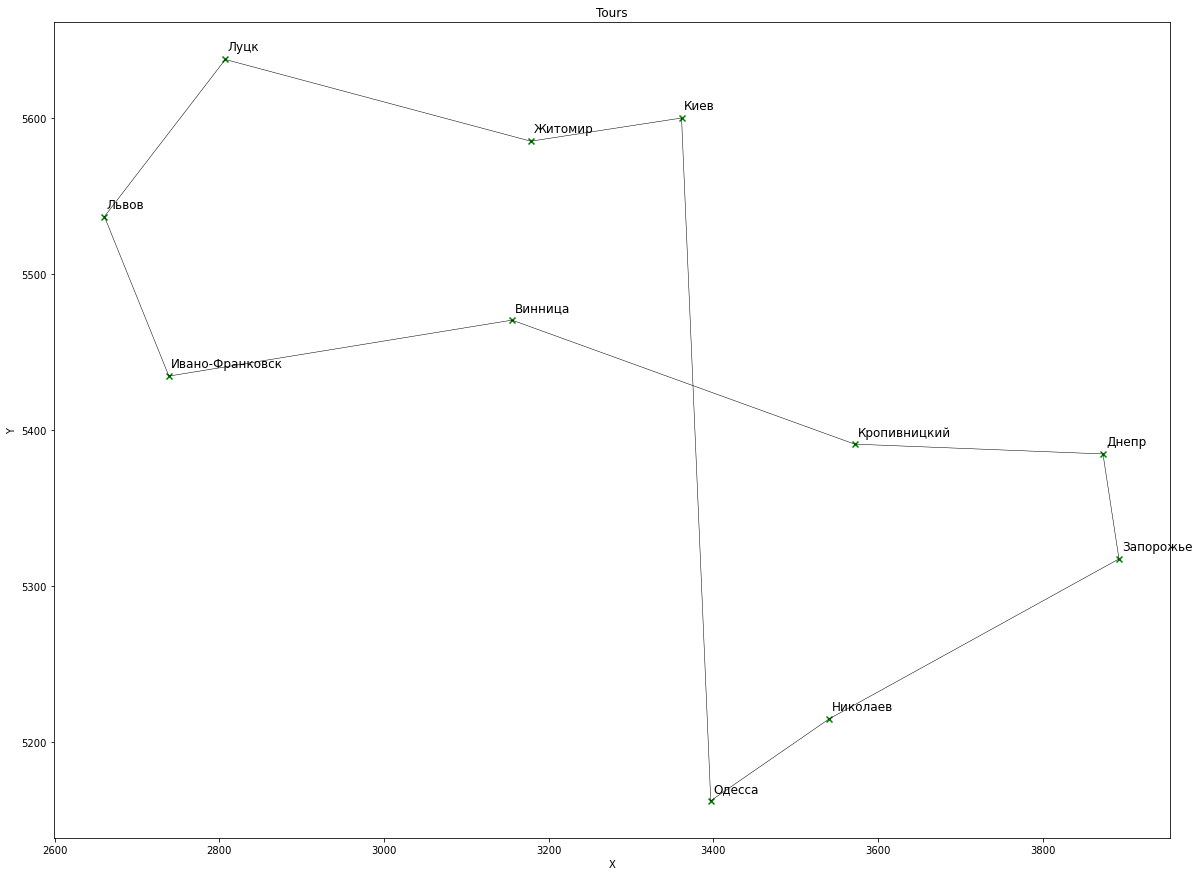

In [545]:
# Visualize the shortest route
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
# locations, geographical coordinates in degrees
# convert to radians
Pi = np.pi
#latitude = Pi/180*latitude
#longitude = Pi/180*longitude
# https://en.wikipedia.org/wiki/Spherical_coordinate_system
theta = longitude # polar angle
phi = latitude-Pi/2 # azimuthal angle
R = 40000/(2*Pi) # radius of Earth 
import math
#X = R*np.sin(theta)*np.cos(phi) # x-coordinates in km
#Y = R*np.sin(theta)*np.sin(phi) # y-coordinates in km
#Z = R*np.cos(theta) # z-coordinates in km
X = 40000/360*longitude
Y = 40000/360*latitude

#,'Николаев','Одесса','Полтава','Ровно','Севастополь','Симферополь','Сумы','Тернополь','Ужгород','Харьков','Херсон','Хмельницкий','Черкассы','Чернигов','Черновцы'
# 'Донецк','Луганск',

def plot_tours(cityNames, r):
    tours = [[r[i], r[i+1]] for i in range(N)]
    plt.figure(1, figsize=(20,15))
    for s, tour in enumerate(tours):
        plt.plot([ X[tour[0]], X[tour[1]] ], [ Y[tour[0]], Y[tour[1]] ], color = "black", linewidth=0.5) # line
        plt.scatter(X[tour[1]], Y[tour[1]], marker = 'x', color = 'g', label = cityNames[tour[1]]) # dot
        plt.text(X[tour[1]]*1.001, Y[tour[1]]*1.001, cityNames[tour[1]], fontsize=12)
    #plt.scatter(0,0, marker = "o", color = 'b', label = "factory")
    plt.xlabel("X"), plt.ylabel("Y"), plt.title("Tours") #, plt.legend(loc = 1)
    plt.show()

plot_tours(cityNames, r)

# Draft

In [ ]:
# Distances from Google
import requests
import json
#Enter your source and destination city
originPoint = input("Please enter your origin city: ")
destinationPoint= input("Please enter your destination city: ")
#Place your google map API_KEY to a variable
apiKey = 'YOUR_API_KEY'
#Store google maps api url in a variable
url = 'https://maps.googleapis.com/maps/api/distancematrix/json?'
# call get method of request module and store respose object
r = requests.get(url + 'origins = ' + originPoint + '&destinations = ' + destinationPoint + '&key = ' + apiKey)
#Get json format result from the above response object
res = r.json()
#print the value of res
print(res)

In [ ]:
def opt2():
    print("Optimize pairs")
    global d_min,r
    d_old = d_min+1
    while d_min < d_old:
        d_old = d_min
        for i in range(N-2):
            SC = r[i]; # starting city, fixed
            A = r[i+1]; B = r[i+2]; # next 2 cities
            FC = r[i+3]; # finishing city, fixed
            l1 = d[SC][A] + d[A][B] + d[B][FC] # AB
            l2 = d[SC][B] + d[B][A] + d[A][FC] # BA
            if l2 < l1:
                r[i+1] = B; r[i+2] = A; # swap A and B
                d_min -= l1-l2
                print(A,B,'->',B,A)
        if d_min < d_old: PR()
def opt3():
    print("Cycle 3 cities")
    global d_min,r
    d_old = d_min+1
    while d_min < d_old:
        d_old = d_min
        for i in range(N-3):
            SC = r[i]; # starting city, fixed
            A = r[i+1]; B = r[i+2]; C = r[i+3]; # next 3 cities
            FC = r[i+4]; # finishing city, fixed
            l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][FC] # ABC
            # one swap at a time is accounted in pairs above: ABC -> ACB, BAC
            l2 = d[SC][B] + d[B][C] + d[C][A] + d[A][FC] # BCA
            if l2 < l1:
                r[i+1] = B; r[i+2] = C; r[i+3] = A; # ABC -> BCA
                d_min -= l1-l2
                A = r[i+1]; B = r[i+2]; C = r[i+3];
                l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][FC]
                print(A,B,C,'->',B,C,A)
            else:
                l2 = d[SC][C] + d[C][A] + d[A][B] + d[B][FC] # CAB (this would be ABC again if we swapped to BCA)
                if l2 < l1:
                    r[i+1] = C; r[i+2] = A; r[i+3] = B; # ABC -> CAB
                    d_min -= l1-l2
                    A = r[i+1]; B = r[i+2]; C = r[i+3];
                    l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][FC]
                    print(A,B,C,'->',C,A,B)
            l2 = d[SC][C] + d[C][B] + d[B][A] + d[A][FC] # CBA
            if l2 < l1:
                r[i+1] = C; r[i+2] = B; r[i+3] = A; # ABC -> CBA
                d_min -= l1-l2
                A = r[i+1]; B = r[i+2]; C = r[i+3];
                l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][FC]
                print('Needed!')
                print(A,B,C,'->',C,B,A)
        if d_min < d_old: PR()
def opt4():
    print("Cycle 4 cities")
    global d_min,r
    d_old = d_min+1
    while d_min < d_old:
        d_old = d_min
        for i in range(N-4):
            SC = r[i]; # starting city, fixed
            A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; # next 4 cities
            FC = r[i+5]; # finishing city, fixed
            l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][D] + d[D][FC] # ABCD
            l2 = d[SC][B] + d[B][C] + d[C][D] + d[D][A] + d[A][FC] # BCDA
            if l2 < l1:
                print(A,B,C,D,'->',B,C,D,A)
                r[i+1] = B; r[i+2] = C; r[i+3] = D; r[i+4] = A; # ABCD -> BCDA
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4];
            l2 = d[SC][C] + d[C][D] + d[D][A] + d[A][B] + d[B][FC] # CDAB
            if l2 < l1:
                print(A,B,C,D,'->',C,D,A,B)
                r[i+1] = C; r[i+2] = D; r[i+3] = A; r[i+4] = B; # ABCD -> CDAB
                d_min -= l1-l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4];
                l1 = l2
            l2 = d[SC][D] + d[D][A] + d[A][B] + d[B][C] + d[C][FC] # DABC
            if l2 < l1:
                print(A,B,C,D,'->',D,A,B,C)
                r[i+1] = D; r[i+2] = A; r[i+3] = B; r[i+4] = C; # ABCD -> DABC
                d_min -= l1-l2
                A = r[i]; B = r[i+1]; C = r[i+2]; D = r[i+3];
                l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][D] + d[D][FC]
        if d_min < d_old: PR()
def opt5():
    print("Cycle 5 cities")
    global d_min,r
    d_old = d_min+1
    while d_min < d_old:
        d_old = d_min
        for i in range(N-5):
            SC = r[i]; # starting city, fixed
            A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5] # next 5 cities
            FC = r[i+6]; # finishing city, fixed
            l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][D] + d[D][E] + d[E][FC] # ABCDE
            l2 = d[SC][B] + d[B][C] + d[C][D] + d[D][E] + d[E][A] + d[A][FC] # BCDEA
            if l2 < l1:
                print(A,B,C,D,E,'->',B,C,D,E,A)
                r[i+1] = B; r[i+2] = C; r[i+3] = D; r[i+4] = E; r[i+5] = A; # ABCDE -> BCDEA
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5];
            l2 = d[SC][C] + d[C][D] + d[D][E] + d[E][A] + d[A][B] + d[B][FC] # CDEAB
            if l2 < l1:
                print(A,B,C,D,E,'->',C,D,E,A,B)
                r[i+1] = C; r[i+2] = D; r[i+3] = E; r[i+4] = A; r[i+5] = B; # ABCDE -> CDEAB
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5];
            l2 = d[SC][D] + d[D][E] + d[E][A] + d[A][B] + d[B][C] + d[C][FC] # DEABC
            if l2 < l1:
                print(A,B,C,D,E,'->',D,E,A,B,C)
                r[i+1] = D; r[i+2] = E; r[i+3] = A; r[i+4] = B; r[i+5] = C; # ABCDE -> DEABC
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5];           
            l2 = d[SC][E] + d[E][A] + d[A][B] + d[B][C] + d[C][D] + d[D][FC] # EABCD
            if l2 < l1:
                print(A,B,C,D,E,'->',E,A,B,C,D)
                r[i+1] = E; r[i+2] = A; r[i+3] = B; r[i+4] = C; r[i+5] = D; # ABCDE -> EABCD
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5];           
        if d_min < d_old: PR()
def opt6():
    print("Cycle 6 cities")
    global d_min,r
    d_old = d_min+1
    while d_min < d_old:
        d_old = d_min
        for i in range(N-6):
            SC = r[i]; # starting city, fixed
            A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; # next 6 cities
            FC = r[i+7]; # finishing city, fixed
            l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][D] + d[D][E] + d[E][F] + d[F][FC] # ABCDEF
            l2 = d[SC][B] + d[B][C] + d[C][D] + d[D][E] + d[E][F] + d[F][A] + d[A][FC] # BCDEFA
            if l2 < l1:
                print(A,B,C,D,E,F,'->',B,C,D,E,F,A)
                r[i+1] = B; r[i+2] = C; r[i+3] = D; r[i+4] = E; r[i+5] = F; r[i+6] = A; # ABCDEF -> BCDEFA
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6];
            l2 = d[SC][C] + d[C][D] + d[D][E] + d[E][F] + d[F][A] + d[A][B] + d[B][FC] # CDEFAB
            if l2 < l1:
                print(A,B,C,D,E,F,'->',C,D,E,F,A,B)
                r[i+1] = C; r[i+2] = D; r[i+3] = E; r[i+4] = F; r[i+5] = A; r[i+6] = B; # ABCDEF -> CDEFAB
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6];
            l2 = d[SC][D] + d[D][E] + d[E][F] + d[F][A] + d[A][B] + d[B][C] + d[C][FC] # DEFABC
            if l2 < l1:
                print(A,B,C,D,E,F,'->',D,E,F,A,B,C)
                r[i+1] = D; r[i+2] = E; r[i+3] = F; r[i+4] = A; r[i+5] = B; r[i+6] = C; # ABCDEF -> DEFABC
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6];           
            l2 = d[SC][E] + d[E][F] + d[F][A] + d[A][B] + d[B][C] + d[C][D] + d[D][FC] # EFABCD
            if l2 < l1:
                print(A,B,C,D,E,F,'->',E,F,A,B,C,D)
                r[i+1] = E; r[i+2] = F; r[i+3] = A; r[i+4] = B; r[i+5] = C; r[i+6] = D; # ABCDEF -> EFABCD
                d_min -= l1-l2
                l1 = l2
            A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6];           
            l2 = d[SC][F] + d[F][A] + d[A][B] + d[B][C] + d[C][D] + d[D][E] + d[E][FC] # FABCDE
            if l2 < l1:
                print(A,B,C,D,E,F,'->',F,A,B,C,D,E)
                r[i+1] = F; r[i+2] = A; r[i+3] = B; r[i+4] = C; r[i+5] = D; r[i+6] = E; # ABCDEF -> FABCDE
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6];           
        if d_min < d_old: PR()
def opt7():
    print("Cycle 7 cities")
    global d_min,r
    d_old = d_min+1
    while d_min < d_old:
        d_old = d_min
        for i in range(N-7):
            SC = r[i]; # starting city, fixed
            A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; G = r[i+7]; # next 7 cities
            FC = r[i+8]; # finishing city, fixed
            l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][D] + d[D][E] + d[E][F] + d[F][G] + d[G][FC] # ABCDEFG
            l2 = d[SC][B] + d[B][C] + d[C][D] + d[D][E] + d[E][F] + d[F][G] + d[G][A] + d[A][FC] # BCDEFGA
            if l2 < l1:
                print(A,B,C,D,E,F,G,'->',B,C,D,E,F,G,A)
                r[i+1] = B; r[i+2] = C; r[i+3] = D; r[i+4] = E; r[i+5] = F; r[i+6] = G; r[i+7] = A; # ABCDEFG -> BCDEFGA
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; G = r[i+7];
            l2 = d[SC][C] + d[C][D] + d[D][E] + d[E][F] + d[F][G] + d[G][A] + d[A][B] + d[B][FC] # CDEFGAB
            if l2 < l1:
                print(A,B,C,D,E,F,G,'->',C,D,E,F,G,A,B)
                r[i+1] = C; r[i+2] = D; r[i+3] = E; r[i+4] = F; r[i+5] = G; r[i+6] = A; r[i+7] = B; # ABCDEFG -> CDEFABG
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; G = r[i+7];
            l2 = d[SC][D] + d[D][E] + d[E][F] + d[F][G] + d[G][A] + d[A][B] + d[B][C] + d[C][FC] # DEFGABC
            if l2 < l1:
                print(A,B,C,D,E,F,G,'->',D,E,F,G,A,B,C)
                r[i+1] = D; r[i+2] = E; r[i+3] = F; r[i+4] = G; r[i+5] = A; r[i+6] = B; r[i+7] = C; # ABCDEFG -> DEFGABC
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; G = r[i+7];           
            l2 = d[SC][E] + d[E][F] + d[F][G] + d[G][A] + d[A][B] + d[B][C] + d[C][D] + d[D][FC] # EFGABCD
            if l2 < l1:
                print(A,B,C,D,E,F,G,'->',E,F,G,A,B,C,D)
                r[i+1] = E; r[i+2] = F; r[i+3] = G; r[i+4] = A; r[i+5] = B; r[i+6] = C; r[i+7] = D; # ABCDEFG -> EFGABCD
                d_min -= l1-l2
                l1 = l2
            A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; G = r[i+7];          
            l2 = d[SC][F] + d[F][G] + d[G][A] + d[A][B] + d[B][C] + d[C][D] + d[D][E] + d[E][FC] # FGABCDE
            if l2 < l1:
                print(A,B,C,D,E,F,G,'->',F,G,A,B,C,D,E)
                r[i+1] = F; r[i+2] = G; r[i+3] = A; r[i+4] = B; r[i+5] = C; r[i+6] = D; r[i+7] = E; # ABCDEFG -> FGABCDE
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; G = r[i+7];           
            l2 = d[SC][G] + d[G][A] + d[A][B] + d[B][C] + d[C][D] + d[D][E] + d[E][F] + d[F][FC] # GABCDEF
            if l2 < l1:
                print(A,B,C,D,E,F,G,'->',G,A,B,C,D,E,F)
                r[i+1] = G; r[i+2] = A; r[i+3] = B; r[i+4] = C; r[i+5] = D; r[i+6] = E; r[i+7] = F;  # ABCDEFG -> GABCDEF
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; G = r[i+7];           
        if d_min < d_old: PR()
